# Final Project Report

* Class: DS 5100
* Student Name: Pranav Thiriveedhi
* Student Net ID: avz7me
* This URL: https://github.com/prans792/ds5100_final_project/blob/main/DS51200_FinalProjectTemplate.ipyn

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/prans792/ds5100_final_project

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [1]:
# A code block with your classes.
'''
# Monte Carlo Module
# Pranav Thiriveedhi
# DS 5100 Final Project

# Import Statements
import numpy as np
import pandas as pd


# Die Class
class Die:
    """
    Die has N sides and W weights, can be rolled to select a face.
    If N = 2, it is a coin, if N = 6, it is a standard die.
    """
    def __init__(self, faces):
        """
        Die with number of faces as an argument.
        Parameters:
        - faces: Array of number of faces.
        Raises:
        - TypeError: Number of faces is not a NumPy array.
        - ValueError: Number of faces is not distinct.
        """
        if not isinstance(faces, np.ndarray):
            raise TypeError("Number of faces must be a NumPy array.")
        if len(faces) != len(set(faces)):
            raise ValueError("Each face should have a distinct value.")
        
        self._faces = faces
        self._weights = np.ones(len(faces), dtype=float)
        self._die_df = pd.DataFrame({'Face': faces, 'Weight': self._weights}).set_index('Face')

    def change_weight(self, face_value, new_weight):
        """
        Changes the weight of a face's value to a new weight.
        Parameters:
        - face_value: The face value to change the weight for.
        - new_weight (int or float): The new weight value for the face specified.
        Raises:
        - IndexError: The face is not in the die array.
        - TypeError: The weight is not numeric (int or float).
        """
        if face_value not in self._die_df.index:
            raise IndexError("Face is not in die array.")
        try:
            new_weight = float(new_weight)
        except ValueError:
            raise TypeError("Weight is not a numeric value.")
        self._die_df.at[face_value, 'Weight'] = new_weight

    def roll(self, num_rolls=1):
        """
        How many times a die is rolled.
        Parameters:
        - num_rolls (int): Number of die rolls. Defaults to 1.
        Returns:
        - list: List of rolled faces.
        """
        return list(self._die_df.sample(n=num_rolls, weights='Weight', replace=True).index)

    def show(self):
        """
        Returns a copy of the private dataframe of the die's current status
        Returns:
        - pd.DataFrame: Data frame of current state of die.
        """
        return self._die_df.copy()

    
# Game Class
class Game:
    """
    Game involving rolling one or more die objects, one or more times.
    """
    def __init__(self, dice):
        """
        List of similar dice.
        Parameters:
        - dice (list of Die): List of Die objects.
        """
        self._dice = dice
        self._results_df = None

    def play(self, num_rolls):
        """
        Rolls dice a specified number of times.
        Parameters:
        - num_rolls (int): Number of rolls to play.
        Updates:
        - _results_df (pd.DataFrame): Results of the game in wide format.
        """
        rolls = {f'Die_{i}': die.roll(num_rolls) for i, die in enumerate(self._dice)}
        self._results_df = pd.DataFrame(rolls)

    def show(self, form='wide'):
        """
        Shows the results of the most recent play.
        Parameters:
        - form (str): wide or narrow format. Defaults to wide.
        Returns:
        - pd.DataFrame: Dataframe in wide or narrow format.
        Raises:
        - ValueError: If an invalid format is given.
        """
        if self._results_df is None:
            return None
        
        if form == 'wide':
            return self._results_df.copy()
        elif form == 'narrow':
            return self._results_df.stack().reset_index(name='Face').rename(columns={'roll_0': 'Roll', 'roll_1': 'Die'})
        else:
            raise ValueError("Needs to be a narrow or wide option.")


# Analyzer Class
class Analyzer:
    """
    A class to analyze the results of a game and computer varius statistics about it.
    """
    def __init__(self, game):
        """
        Initializes the Analyzer with a Game object.
        Parameters:
        - game (Game): Game object.
        Raises:
        - ValueError: If the value is not a Game object.
        """
        if not isinstance(game, Game):
            raise ValueError("Passed value must be a Game object.")
        self._game = game
        self._results = game.show()

    def jackpot(self):
        """
        Number of jackpots (all faces are the same in a roll).
        Returns:
        - int: How many times the game resulted in jackpots.
        """
        return (self._results.nunique(axis=1) == 1).sum()

    def face_counts(self):
        """
        Counts of each face value for each roll.
        Returns:
        - pd.DataFrame: Data frame of results.
        """
        return self._results.apply(pd.Series.value_counts, axis=1).fillna(0)

    def combo_counts(self):
        """
        Distinct combinations of rolled faces with counts.
        Returns:
        - pd.DataFrame: Data frame with combinations and counts.
        """
        combination = self._results.apply(lambda row: tuple(sorted(row)), axis=1)
        return combination.value_counts().rename_axis('Combination').reset_index(name='Count')

    def permutation_counts(self):
        """
        Distinct permutations of rolled faces with counts.
        Returns:
        - pd.DataFrame: Data frame with permutations and counts.
        """
        permutations = self._results.apply(tuple, axis=1)
        return permutations.value_counts().rename_axis('Permutation').reset_index(name='Count')
'''

'\n# Monte Carlo Module\n# Pranav Thiriveedhi\n# DS 5100 Final Project\n\n# Import Statements\nimport numpy as np\nimport pandas as pd\n\n\n# Die Class\nclass Die:\n    """\n    Die has N sides and W weights, can be rolled to select a face.\n    If N = 2, it is a coin, if N = 6, it is a standard die.\n    """\n    def __init__(self, faces):\n        """\n        Die with number of faces as an argument.\n        Parameters:\n        - faces: Array of number of faces.\n        Raises:\n        - TypeError: Number of faces is not a NumPy array.\n        - ValueError: Number of faces is not distinct.\n        """\n        if not isinstance(faces, np.ndarray):\n            raise TypeError("Number of faces must be a NumPy array.")\n        if len(faces) != len(set(faces)):\n            raise ValueError("Each face should have a distinct value.")\n        \n        self._faces = faces\n        self._weights = np.ones(len(faces), dtype=float)\n        self._die_df = pd.DataFrame({\'Face\': face

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [3]:
# A code block with your test code.
'''
# Unittest Monte Carlo Module
# Pranav Thiriveedhi
# DS 5100 Final Project

# Import Statements
import unittest
import numpy as np
import pandas as pd
from montecarlo import Die, Game, Analyzer


class TestDie(unittest.TestCase):
    def setUp(self):
        self.faces = np.array([1, 2, 3, 4, 5, 6])
        self.die = Die(self.faces)

    def test_initializer(self):
        self.assertTrue(isinstance(self.die.show(), pd.DataFrame))
        self.assertEqual(self.die.show().shape[0], len(self.faces))

    def test_change_weight(self):
        self.die.change_weight(1, 3)
        df = self.die.show()
        self.assertEqual(df.at[1, 'Weight'], 3)

    def test_roll(self):
        rolls = self.die.roll(10)
        self.assertEqual(len(rolls), 10)
        self.assertTrue(all(face in self.faces for face in rolls))

    def test_show(self):
        df = self.die.show()
        self.assertTrue(isinstance(df, pd.DataFrame))
        self.assertTrue('Weight' in df.columns)


class TestGame(unittest.TestCase):
    def setUp(self):
        faces = np.array([1, 2, 3, 4, 5, 6])
        d1 = Die(faces)
        d2 = Die(faces)
        self.game = Game([d1, d2])

    def test_initializer(self):
        self.assertTrue(isinstance(self.game, Game))

    def test_play(self):
        self.game.play(3)
        results = self.game.show()
        self.assertTrue(isinstance(results, pd.DataFrame))
        self.assertEqual(results.shape[0], 3)

    def test_show(self):
        self.game.play(3)
        wide_results = self.game.show(form='wide')
        self.assertTrue(isinstance(wide_results, pd.DataFrame))

        narrow_results = self.game.show(form='narrow')
        self.assertTrue(isinstance(narrow_results, pd.DataFrame))
        self.assertTrue('Die' in narrow_results.columns)
        self.assertTrue('Face' in narrow_results.columns)


class TestAnalyzer(unittest.TestCase):
    def setUp(self):
        faces = np.array(['1', '2', '3'])
        d1 = Die(faces)
        d2 = Die(faces)
        self.game = Game([d1, d2])
        self.game.play(5)
        self.analyzer = Analyzer(self.game)

    def test_initializer(self):
        self.assertTrue(isinstance(self.analyzer, Analyzer))

    def test_jackpot(self):
        result = self.analyzer.jackpot()

    def test_face_counts(self):
        df = self.analyzer.face_counts()
        self.assertTrue(isinstance(df, pd.DataFrame))
        self.assertEqual(df.shape[0], 5)  # Matches number of rolls

    def test_combo_counts(self):
        df = self.analyzer.combo_counts()
        self.assertTrue(isinstance(df, pd.DataFrame))
        self.assertTrue('Combination' in df.columns or df.index.name == 'Combination')
        self.assertTrue('Count' in df.columns)

    def test_permutation_counts(self):
        df = self.analyzer.permutation_counts()
        self.assertTrue(isinstance(df, pd.DataFrame))
        self.assertTrue('Permutation' in df.columns or df.index.name == 'Permutation')
        self.assertTrue('Count' in df.columns)


if __name__ == '__main__':
    unittest.main()
'''

"\n# Unittest Monte Carlo Module\n# Pranav Thiriveedhi\n# DS 5100 Final Project\n\n# Import Statements\nimport unittest\nimport numpy as np\nimport pandas as pd\nfrom montecarlo import Die, Game, Analyzer\n\n\nclass TestDie(unittest.TestCase):\n    def setUp(self):\n        self.faces = np.array([1, 2, 3, 4, 5, 6])\n        self.die = Die(self.faces)\n\n    def test_initializer(self):\n        self.assertTrue(isinstance(self.die.show(), pd.DataFrame))\n        self.assertEqual(self.die.show().shape[0], len(self.faces))\n\n    def test_change_weight(self):\n        self.die.change_weight(1, 3)\n        df = self.die.show()\n        self.assertEqual(df.at[1, 'Weight'], 3)\n\n    def test_roll(self):\n        rolls = self.die.roll(10)\n        self.assertEqual(len(rolls), 10)\n        self.assertTrue(all(face in self.faces for face in rolls))\n\n    def test_show(self):\n        df = self.die.show()\n        self.assertTrue(isinstance(df, pd.DataFrame))\n        self.assertTrue('Weight' i

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

In [4]:
# A text block with the output of a successful test.
'''
avz7me@rivanna> python -m unittest test_montecarlo.py
............
----------------------------------------------------------------------
Ran 12 tests in 0.022s

OK
avz7me@rivanna> 
'''


'\navz7me@rivanna> python -m unittest test_montecarlo.py\n............\n----------------------------------------------------------------------\nRan 12 tests in 0.022s\n\nOK\navz7me@rivanna> \n'

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [7]:
import montecarlo 

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [8]:
help(montecarlo)

Help on module montecarlo:

NAME
    montecarlo

DESCRIPTION
    # Monte Carlo Module
    # Pranav Thiriveedhi
    # DS 5100 Final Project

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  A class to analyze the results of a game and computer varius statistics about it.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Initializes the Analyzer with a Game object.
     |      Parameters:
     |      - game (Game): Game object.
     |      Raises:
     |      - ValueError: If the value is not a Game object.
     |  
     |  combo_counts(self)
     |      Distinct combinations of rolled faces with counts.
     |      Returns:
     |      - pd.DataFrame: Data frame with combinations and counts.
     |  
     |  face_counts(self)
     |      Counts of each face value for each roll.
     |      Returns:
     |      - pd.DataFrame: Data frame of results.

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/prans792/ds5100_final_project/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from montecarlo import Die, Game, Analyzer

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [11]:
fair_coin = Die(np.array(['H', 'T']))
unfair_coin = Die(np.array(['H', 'T']))
unfair_coin.change_weight('H', 5)


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [12]:
game1 = Game([fair_coin, fair_coin])
game1.play(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [13]:
game2 = Game([unfair_coin, unfair_coin, fair_coin])
game2.play(1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [14]:
analyzer1 = Analyzer(game1)
analyzer2 = Analyzer(game2)
jackpots_game1 = analyzer1.jackpot()
jackpots_game2 = analyzer2.jackpot()

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [15]:
relative_freq_game1 = jackpots_game1 / 1000
relative_freq_game2 = jackpots_game2 / 1000

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

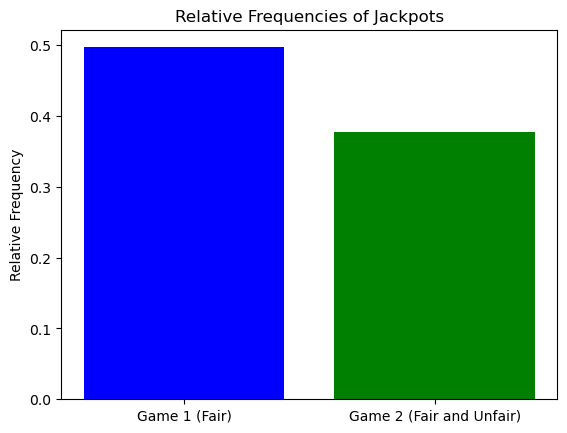

In [17]:
plt.bar(['Game 1 (Fair)', 'Game 2 (Fair and Unfair)'], [relative_freq_game1, relative_freq_game2], color=['blue', 'green'])
plt.title('Relative Frequencies of Jackpots')
plt.ylabel('Relative Frequency')
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [18]:
die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
die3 = Die(np.array([1, 2, 3, 4, 5, 6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [19]:
die2.change_weight(6, 5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [20]:
die3.change_weight(1, 5)


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [21]:
game3 = Game([die1, die1, die1, die1, die1])
game3.play(10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [22]:
game4 = Game([die2, die3, die1, die1, die1])
game4.play(10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

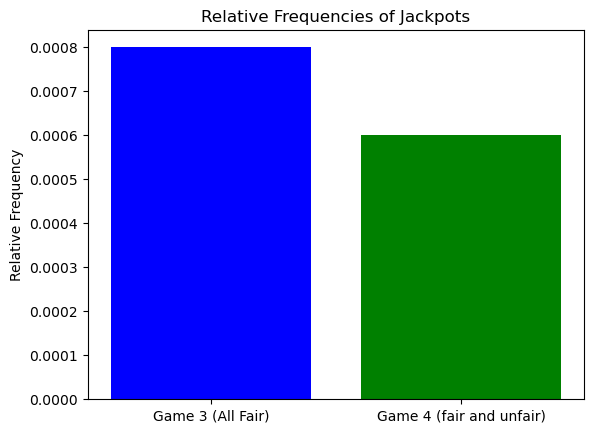

In [25]:
analyzer3 = Analyzer(game3)
analyzer4 = Analyzer(game4)
rel_freq_game3 = analyzer3.jackpot() / 10000
rel_freq_game4 = analyzer4.jackpot() / 10000

plt.bar(['Game 3 (All Fair)', 'Game 4 (fair and unfair)'], [rel_freq_game3, rel_freq_game4], color=['blue', 'green'])
plt.title('Relative Frequencies of Jackpots')
plt.ylabel('Relative Frequency')
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [27]:
letter_weights = pd.read_csv('english_letters.txt', header=None, names=['Letter', 'Frequency'])
letters = letter_weights['Letter'].to_numpy()
frequencies = letter_weights['Frequency'].to_numpy()

letter_die = Die(letters)
for i, letter in enumerate(letters):
    letter_die.change_weight(letter, frequencies[i])

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).